In [1]:
import pandas as pd
import numpy as np

data = pd.ExcelFile('Data-All.xlsx')
print(data.sheet_names)
df1 = data.parse('Sheet1')
df1.info()

['Sheet1']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39782 entries, 0 to 39781
Data columns (total 34 columns):
Claim                               39782 non-null int64
Effective Year                      39782 non-null int64
Account                             39782 non-null int64
Market                              39782 non-null object
Sex                                 39778 non-null object
Jurisdiction State                  39781 non-null object
Accident State                      39782 non-null object
Classcode                           39782 non-null object
Class Desription                    39606 non-null object
Occupation                          39782 non-null object
Date of Birth                       39781 non-null datetime64[ns]
Date of Hire                        39782 non-null datetime64[ns]
Accident Date                       39782 non-null datetime64[ns]
Experience Years                    39782 non-null float64
Age at Accident Date                39782 non-

In [2]:
# Replace the spaces in clumn names to underscore 

df1.columns = df1.columns.str.replace(' ','_')

# conver column headers to lower case

df1.columns = df1.columns.str.lower()

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39782 entries, 0 to 39781
Data columns (total 34 columns):
claim                               39782 non-null int64
effective_year                      39782 non-null int64
account                             39782 non-null int64
market                              39782 non-null object
sex                                 39778 non-null object
jurisdiction_state                  39781 non-null object
accident_state                      39782 non-null object
classcode                           39782 non-null object
class_desription                    39606 non-null object
occupation                          39782 non-null object
date_of_birth                       39781 non-null datetime64[ns]
date_of_hire                        39782 non-null datetime64[ns]
accident_date                       39782 non-null datetime64[ns]
experience_years                    39782 non-null float64
age_at_accident_date                39782 non-null float6

In [3]:
# Removal of top of four rows
df2 = df1[4:]
df2.shape

(39778, 34)

In [4]:
# Features to be removed from the data
print('Removing features...')
print(df2.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]])
df2.drop(df2.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]], axis=1, inplace=True)

Removing features...
Index(['claim', 'effective_year', 'account', 'jurisdiction_state',
       'class_desription', 'date_of_birth', 'date_of_hire', 'accident_date',
       'date_reported_to_employer', 'report_date', 'date_of_disability',
       'date_returened_to_work', 'claim_description', 'claim_status',
       'type_of_injury_code', 'body_part', 'cause_of_injury',
       'nature_of_injury_group', 'total_incurred_amount', 'indemnity',
       'medical', 'expenses', 'sum_(medical-indemnity-expenses)'],
      dtype='object')


C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
searchfor = ['Rubbed or Abraded by', 'Lifting or Handling']
df2 = df2[~df2.case_of_injury_group.str.contains('|'.join(searchfor))]

In [6]:
df2['case_of_injury_group'].value_counts()

Strain or Injury by                10516
Fall, Slip, or Trip Injury          8855
Struck or Injured by                5888
Cut, Puncture, Scrape               4261
Miscellaneous                       4034
Caught In, Under, or Between        1477
Heat or Cold Exposures              1408
Striking Against or Stepping On     1280
Vehicle                             1265
Name: case_of_injury_group, dtype: int64

In [7]:
text_label = ['Caught In, Under, or Between', 'Cut, Puncture, Scrape', 'Fall, Slip, or Trip Injury', 
                    'Heat or Cold Exposures', 'Miscellaneous', 'Strain or Injury by', 
                    'Striking Against or Stepping On', 'Struck or Injured by', 'Vehicle'
        ]
text_label

['Caught In, Under, or Between',
 'Cut, Puncture, Scrape',
 'Fall, Slip, or Trip Injury',
 'Heat or Cold Exposures',
 'Miscellaneous',
 'Strain or Injury by',
 'Striking Against or Stepping On',
 'Struck or Injured by',
 'Vehicle']

In [8]:
check = df2['case_of_injury_group'].value_counts()
check

Strain or Injury by                10516
Fall, Slip, or Trip Injury          8855
Struck or Injured by                5888
Cut, Puncture, Scrape               4261
Miscellaneous                       4034
Caught In, Under, or Between        1477
Heat or Cold Exposures              1408
Striking Against or Stepping On     1280
Vehicle                             1265
Name: case_of_injury_group, dtype: int64

In [9]:
# Standardization of features
df2["experience_years"] = (df2["experience_years"]-df2["experience_years"].min()) / (df2["experience_years"].max()-df2["experience_years"].min())
df2["age_at_accident_date"] = (df2["age_at_accident_date"]-df2["age_at_accident_date"].min()) / (df2["age_at_accident_date"].max()-df2["age_at_accident_date"].min())

In [10]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df2['market'] = LE.fit_transform(df2['market'])
df2['type_of_injury'] = LE.fit_transform(df2['type_of_injury'])
df2['case_of_injury_group'] = LE.fit_transform(df2['case_of_injury_group'])
df2['nature_of_injury'] = LE.fit_transform(df2['nature_of_injury'])
df2['body_part_group'] = LE.fit_transform(df2['body_part_group'])
df2['occupation'] = LE.fit_transform(df2['occupation'].astype(str))
df2['accident_state'] = LE.fit_transform(df2['accident_state'])
df2['sex'] = LE.fit_transform(df2['sex'])
df2['classcode'] = LE.fit_transform(df2['classcode'].astype(str))

In [11]:
# Standardization

df2["nature_of_injury"] = (df2["nature_of_injury"]-df2["nature_of_injury"].min()) / (df2["nature_of_injury"].max()-df2["nature_of_injury"].min())
df2["accident_state"] = (df2["accident_state"]-df2["accident_state"].min()) / (df2["accident_state"].max()-df2["accident_state"].min())
df2["type_of_injury"] = (df2["type_of_injury"]-df2["type_of_injury"].min()) / (df2["type_of_injury"].max()-df2["type_of_injury"].min())
df2["occupation"] = (df2["occupation"]-df2["occupation"].min()) / (df2["occupation"].max()-df2["occupation"].min())
df2["classcode"] = (df2["classcode"]-df2["classcode"].min()) / (df2["classcode"].max()-df2["classcode"].min())
df2["body_part_group"] = (df2["body_part_group"]-df2["body_part_group"].min()) / (df2["body_part_group"].max()-df2["body_part_group"].min())
df2["market"] = (df2["market"]-df2["market"].min()) / (df2["market"].max()-df2["market"].min())
df2["sex"] = (df2["sex"]-df2["sex"].min()) / (df2["sex"].max()-df2["sex"].min())

In [12]:
df2.head()

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
4,0.750000,0.5,0.44,0.340081,0.846971,0.552271,0.589935,0.666667,0.666667,2,0.666667
5,0.750000,0.5,0.90,0.340081,0.940864,0.557574,0.746223,0.333333,0.166667,2,0.666667
6,0.520833,0.5,0.04,0.052632,0.478880,0.447336,0.506133,0.000000,0.500000,7,0.666667
7,0.479167,0.5,0.04,0.052632,0.532344,0.429462,0.567563,0.333333,0.166667,7,0.666667
8,0.479167,0.0,0.04,0.052632,0.645667,0.429266,0.626362,1.000000,0.500000,2,0.666667


In [13]:
# Feature Correlation
df2.corr(method ='pearson')

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
market,1.000000,-0.129918,0.111639,0.318044,-0.029106,-0.017217,-0.062534,-0.017312,-0.011459,-0.008803,-0.016079
sex,-0.129918,1.000000,0.021025,-0.104659,0.088748,0.081005,0.063710,0.041884,0.001785,0.010431,0.026611
accident_state,0.111639,0.021025,1.000000,0.057452,0.024411,-0.006977,-0.017219,0.003423,0.009392,-0.005890,0.010095
classcode,0.318044,-0.104659,0.057452,1.000000,-0.014604,-0.011932,-0.045570,-0.017485,-0.046937,0.039001,-0.008273
occupation,-0.029106,0.088748,0.024411,-0.014604,1.000000,0.024148,0.023144,-0.002877,0.009307,-0.003164,0.014532
experience_years,-0.017217,0.081005,-0.006977,-0.011932,0.024148,1.000000,0.392090,0.020873,0.014454,-0.000875,0.027485
age_at_accident_date,-0.062534,0.063710,-0.017219,-0.045570,0.023144,0.392090,1.000000,0.120935,0.025640,-0.008402,0.045817
type_of_injury,-0.017312,0.041884,0.003423,-0.017485,-0.002877,0.020873,0.120935,1.000000,0.043909,0.007068,0.068703
body_part_group,-0.011459,0.001785,0.009392,-0.046937,0.009307,0.014454,0.025640,0.043909,1.000000,-0.125029,0.217701
case_of_injury_group,-0.008803,0.010431,-0.005890,0.039001,-0.003164,-0.000875,-0.008402,0.007068,-0.125029,1.000000,0.027581


In [14]:
features = df2.drop('case_of_injury_group', 1)
labels = df2[['case_of_injury_group']]


In [29]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print('Number of train and test data:')
print(number_of_train, number_of_test)

Number of train and test data:
31187 7797


In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE('minority')
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)
print(x_train_res.shape, y_train_res.shape)

(38549, 10) (38549,)


C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from keras.utils import to_categorical
#one-hot encode target column
train_y_2 = to_categorical(Y_train)
test_y_2 = to_categorical(Y_test)

#vcheck that target column has been converted
train_y_2[0:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))

model.add(Dense(9, activation='softmax'))


In [33]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience=10)

#train model
model.fit(X_train, train_y_2, epochs=20, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 24949 samples, validate on 6238 samples
Epoch 1/20
24949/24949 [==============================] - 5s 199us/step - loss: 1.5040 - acc: 0.4538 - val_loss: 1.3430 - val_acc: 0.5348
Epoch 2/20
24949/24949 [==============================] - 4s 162us/step - loss: 1.3448 - acc: 0.5201 - val_loss: 1.2940 - val_acc: 0.5343
Epoch 3/20
24949/24949 [==============================] - 4s 165us/step - loss: 1.2877 - acc: 0.5366 - val_loss: 1.2518 - val_acc: 0.5486
Epoch 4/20
24949/24949 [==============================] - 4s 171us/step - loss: 1.2620 - acc: 0.5453 - val_loss: 1.2681 - val_acc: 0.5598
Epoch 5/20
24949/24949 [==============================] - 4s 168us/step - loss: 1.2416 - acc: 0.5486 - val_loss: 1.2103 - val_acc: 0.5632
Epoch 6/20
24949/24949 [==============================] - 4s 166us/step - loss: 1.2360 - acc: 0.5544 - val_loss: 1.1896 - val_acc: 0.5773
Epoch 7/20
24949/24949 [==============================] - 4s 172us/step - loss: 1.2160 - acc: 0.5606 - val_loss: 1.2182 - v

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               2200      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_12 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 1809      
Total para

In [36]:
y_score = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y_2.argmax(axis=1), y_score.argmax(axis=1))
print(cnf_matrix)

[[   0   70   95    2   22   18    0   84    1]
 [   0  665   20    0   25    9    0  109    0]
 [   0   66  885    2  121  406    0  267   15]
 [   0    1    5  247   46    1    0    8    0]
 [   0   26   85   11  586   48    0   64    2]
 [   0   22  381    1   63 1626    0   28   20]
 [   0   16   62    0   19   20    0  150    0]
 [   0  117  308    0  128   94    0  489    3]
 [   0    6   61    0   66   60    0   41    4]]


In [41]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

Normalized confusion matrix


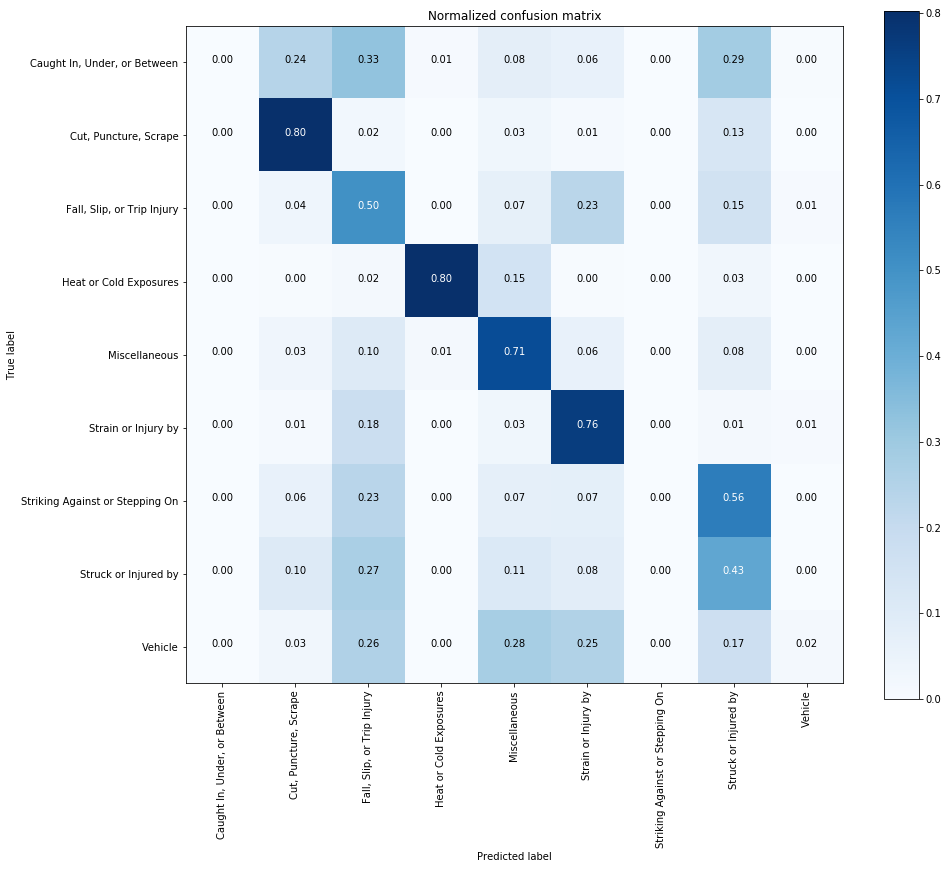

In [40]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools  
    import matplotlib.pyplot as plt
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#y_pred = model.predict(x_test);
#cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(text_label), normalize=True,
                      title='Normalized confusion matrix')

#fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)


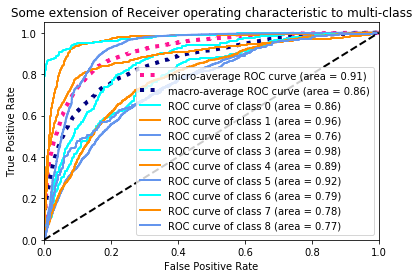

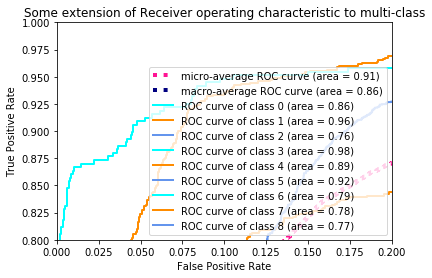

In [39]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 9

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()